In [1]:
import pandas as pd


In [17]:
data_dir = '/Users/sitarapersad/Documents/research/alejandro/data'
tumor = pd.read_csv(f'{data_dir}/dfcna_tumor.txt', sep='\t', index_col=[0]).T
cnas = pd.read_csv(f'{data_dir}/dfcna_cnas.txt', sep='\t', index_col=[0]).T

character_matrix = cnas.loc[tumor.index].iloc[:10000]
del tumor
character_matrix.head()

genomic_region,chr01:115902745-118644250,chr01:131500-5928100,chr01:13368000-16803650,chr01:145326112-152009500,chr01:153197786-156721600,chr01:157095900-223815700,chr01:17550067-24288404,chr01:223971718-226626277,chr01:226626574-248756994,chr01:24288404-46764050,...,chr22:16366264-18389548,chr22:18981850-19885800,chr22:19886350-21982550,chr22:21982726-25202550,chr22:25334447-28147100,chr22:28489900-31795550,chr22:31795769-33777900,chr22:33778050-43089833,chr22:43090050-49609850,chr22:49609850-51237409
RA19_10_21_FACs:121887344154339,-1,0,0,0,-1,0,0,0,0,0,...,0,0,0,0,-1,0,-1,0,0,0
RA19_10_21_FACs:126347847362331,0,0,0,0,-1,0,0,0,0,0,...,0,0,0,0,0,0,-1,0,0,0
RA19_10_21_FACs:241038729046940,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-1,0,0,0
RA19_10_21_FACs:230681442675422,0,0,0,0,-1,0,0,0,0,0,...,0,0,0,0,0,0,-1,0,0,0
RA19_10_21_FACs:240135605479845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
print(f'The character matrix has {character_matrix.shape[0]} samples and {character_matrix.shape[1]} features.')

The character matrix has 10000 samples and 116 features.


Text(0.5, 1.0, 'Character Matrix')

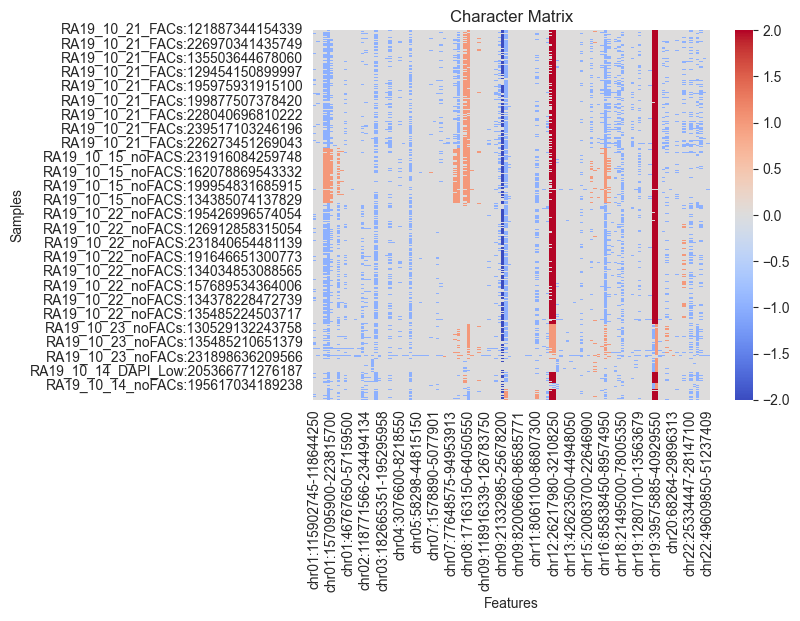

In [4]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.heatmap(character_matrix, cmap='coolwarm')
plt.xlabel('Features')
plt.ylabel('Samples')
plt.title('Character Matrix')

## Feature Selection

We can speed up the runtime of PICASSO by removing any features which are not informative for separating samples; these may be features with insufficient variation across samples. 

We can also optionally do denoising by setting mutations with a low frequency to zero.

In [5]:
# Filter out CNA regions which are modal with a proportion greater than 0.99

print(f'There are {character_matrix.shape[1]} features before filtering.')
character_matrix = character_matrix.loc[:,(character_matrix.values == character_matrix.mode(axis=0).values).mean(axis=0) < 0.99]
print(f'There are {character_matrix.shape[1]} features after filtering.')


There are 116 features before filtering.
There are 64 features after filtering.


Text(0.5, 1.0, 'Character Matrix after Filtering')

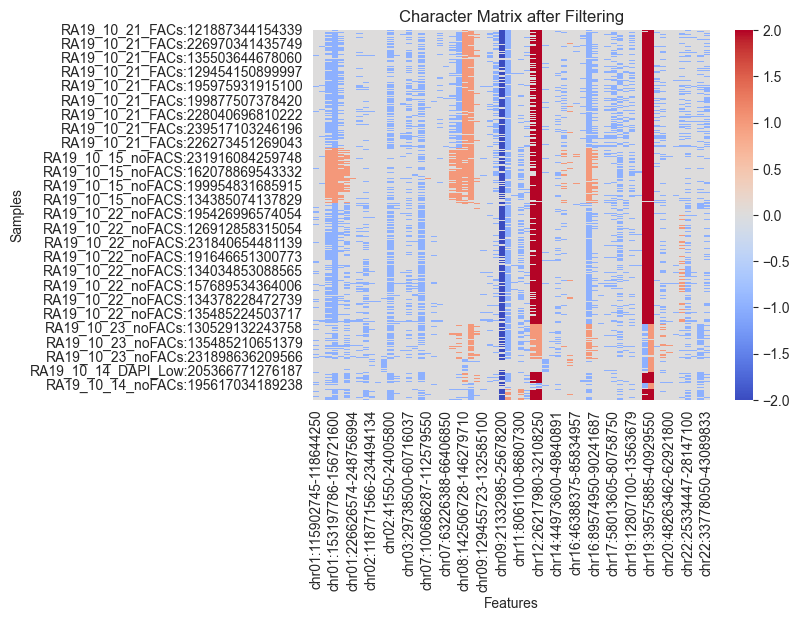

In [6]:
sns.heatmap(character_matrix, cmap='coolwarm')
plt.xlabel('Features')
plt.ylabel('Samples')
plt.title('Character Matrix after Filtering')

# Construct Phylogeny

We can now construct a phylogeny using the filtered character matrix. We will construct a model using the PICASSO algorithm.

In [7]:
from picasso import Picasso

model = Picasso(character_matrix,
                min_depth = 2,
                max_depth=None, 
                min_clone_size = 5,
                terminate_by= 'BIC')

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [8]:
model.fit()

Tree Depth 1: 1 clone(s), 0 terminal clone(s).
100%|██████████| 1/1 [00:02<00:00,  2.31s/it]
Tree Depth 2: 2 clone(s), 0 terminal clone(s).
100%|██████████| 2/2 [00:04<00:00,  2.32s/it]
Tree Depth 3: 4 clone(s), 0 terminal clone(s).
100%|██████████| 4/4 [00:04<00:00,  1.23s/it]
Tree Depth 4: 8 clone(s), 0 terminal clone(s).
100%|██████████| 8/8 [00:03<00:00,  2.31it/s]
Tree Depth 5: 14 clone(s), 2 terminal clone(s).
100%|██████████| 14/14 [00:04<00:00,  2.89it/s]
Tree Depth 6: 19 clone(s), 9 terminal clone(s).
100%|██████████| 19/19 [00:02<00:00,  7.92it/s]
All leaf nodes have been terminated.
PICASSO algorithm finished in 22.57 seconds.


In [9]:
phylogeny = model.get_phylogeny()
# Uncomment the line below to show the phylogeny in a new window
# phylogeny.show()

In [10]:
clone_assignments = model.get_clone_assignments()

# Tree Manipulation

We can now use the clone assignments to construct a clone tree. We can also root the tree at a specific clone to get a more meaningful representation of the phylogeny.

In [11]:
from picasso import  CloneTree
tree = CloneTree(phylogeny, clone_assignments, character_matrix, clone_aggregation='mode')

Initialized CloneTree with 19 clones and 10000 samples.


In [12]:
outgroup = tree.get_most_ancestral_clone()
tree.root_tree(outgroup)

In [13]:
clone_tree = tree.get_clone_phylogeny()
# We can extract the newick string for the clone tree for use in other programs (e.g. ITOL for visualization)
print(clone_tree.write()) 

(1-1-0-1-0-0-STOP:0.5,(((1-1-0-1-0-1-STOP:1)1:1,((1-1-0-1-1-STOP:1)1:1,((((1-1-0-0-1-0-STOP:1)1:1,(1-1-0-0-1-1-STOP:1)1:1)1:1,((1-1-0-0-0-1-STOP:1)1:1,(1-1-0-0-0-0-STOP:1)1:1)1:1)1:1,(((1-1-1-1-STOP:1)1:1,((1-1-1-0-0-STOP:1)1:1,(1-1-1-0-1-STOP:1)1:1)1:1)1:1,(((((1-0-0-0-0-0-STOP:1)1:1,(1-0-0-0-0-1-STOP:1)1:1)1:1,((1-0-0-0-1-1-STOP:1)1:1,(1-0-0-0-1-0-STOP:1)1:1)1:1)1:1,(1-0-0-1-STOP:1)1:1)1:1,(((1-0-1-1-0-STOP:1)1:1,(1-0-1-1-1-STOP:1)1:1)1:1,((1-0-1-0-1-STOP:1)1:1,(1-0-1-0-0-STOP:1)1:1)1:1)1:1)1:2)1:1)1:1)1:1)1:1)1:0.5);


In [14]:
cell_tree = tree.get_sample_phylogeny()
# Uncomment the line below to show the phylogeny in a new window
# cell_tree.show()
# We can also extract the newick string for the clone tree
# print(cell_tree.write()) 


Added 10000 leaves to the tree.


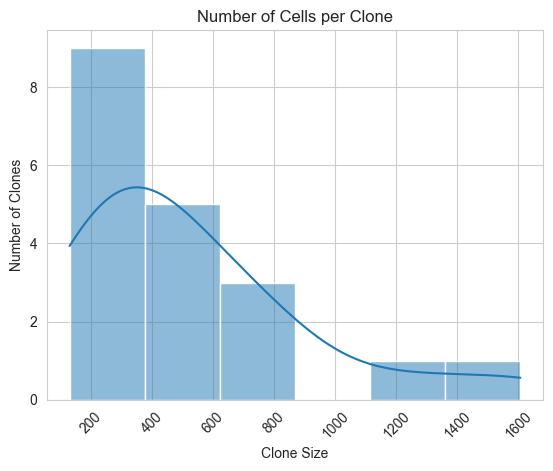

In [15]:
tree.plot_clone_sizes()

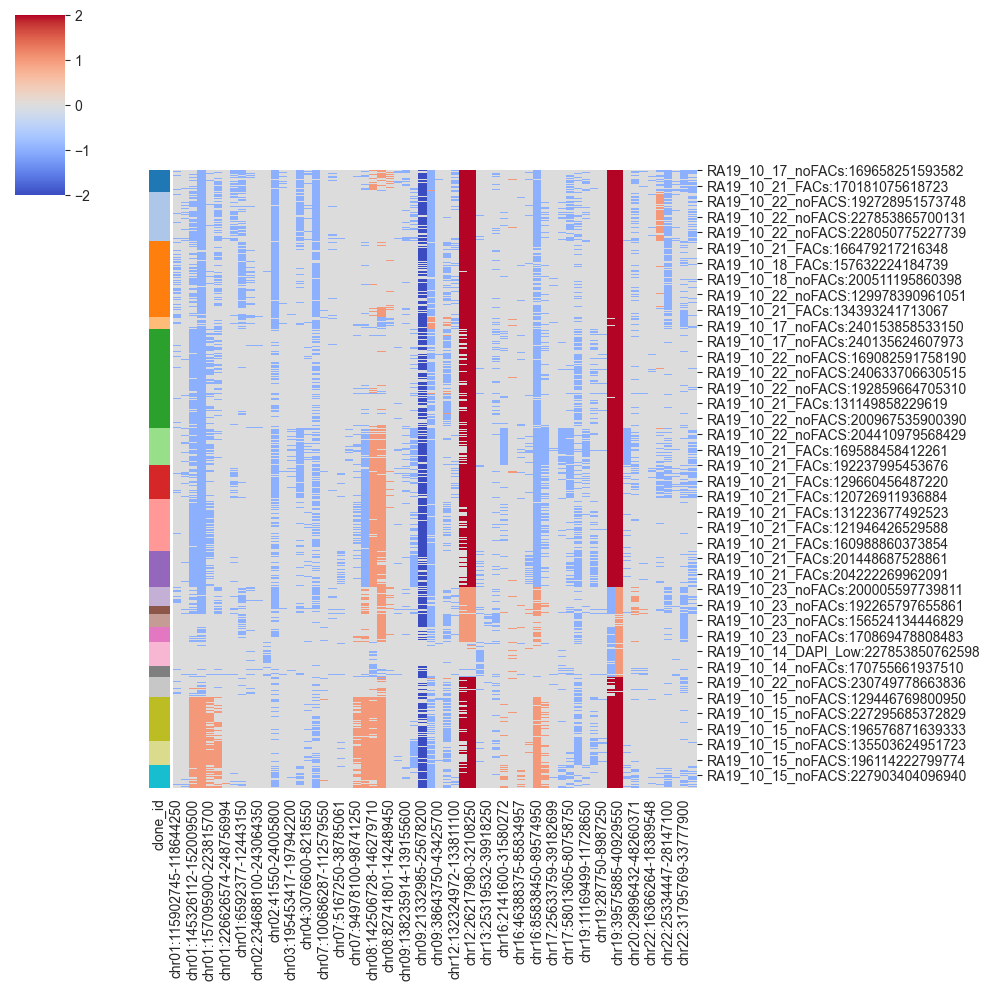

In [16]:
tree.plot_alterations()

# Detailed Visualization

For more detailed visualization, we recommend the iTOL website/application, which accepts as input a newick string and allows for detailed customization of the tree visualization.
